# What is a Decision Tree

## Introduction

### A Decision Tree is a machine learning algorithm used for both classification and regression tasks. It works like a flowchart, where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a final result or prediction. Decision Trees are popular because they are easy to understand, interpret, and visualize.



## How Does a Decision Tree Work?

### A Decision Tree splits the dataset into smaller subsets, while building a tree based on decision rules. It starts from the root node and chooses the best feature to split the data based on a certain criteria. This process continues for each branch until the algorithm either perfectly classifies the data or reaches a stopping condition like maximum depth or minimum number of samples. The goal is to create pure subsets — where most or all data points belong to the same class — with each split.

## Key Components of a Decision Tree

*   Root Node: The first feature that best splits the data
*   Decision Nodes: Nodes where the data is split again based on another feature
*   Leaf/Terminal Nodes: Nodes that represent the final class label or prediction
*   Branches: Represent the decision paths between nodes

## Advantages and Limitations

### Advantages

*   Easy to understand and interpret
*   Can handle both numerical and categorical data
*   Works well with large datasets

### Limitations

*   Prone to overfitting if the tree becomes too complex
*   Small changes in data can lead to a different structure
*   Doesn’t always provide the most accurate predictions without tuning




# Decision Trees in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state = 42, max_depth = 4, class_weight = {0: 1, 1: 2})
clf.fit(X_train_balanced, y_train_balanced)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.7994
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     18297
           1       0.29      0.93      0.44      1703

    accuracy                           0.80     20000
   macro avg       0.64      0.86      0.66     20000
weighted avg       0.93      0.80      0.84     20000



# Visualizing Results

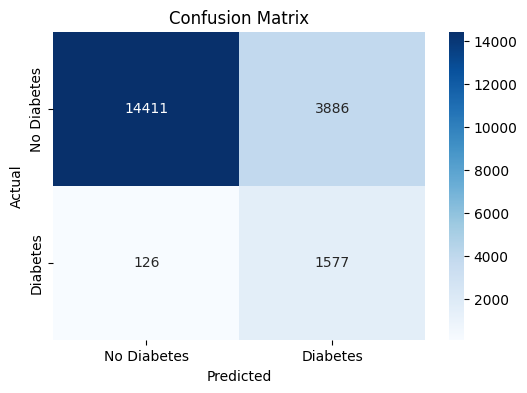

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1577 people with diabetes were correctly predicted to have it.
*   True Negatives - 14411 people without diabetes were correctly predicted to not have it.
*   False Positives - 3886 people without diabetes were wrongly predicted to have it.
*   False Negatives - 126 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people with diabetes (92.60% accuracy), but it's a bit less accurate at finding those without diabetes (78.76% accuracy).

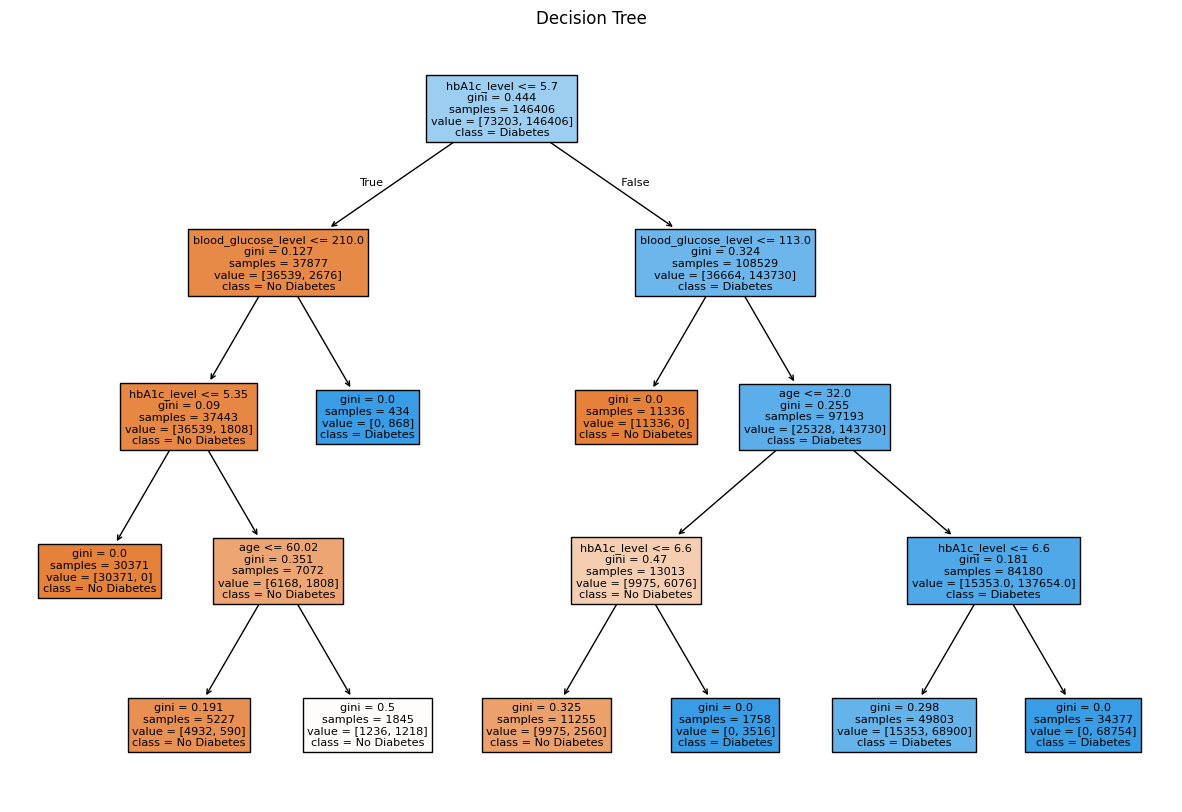

In [3]:
plt.figure(figsize = (15, 10))
plot_tree(clf, feature_names = X.columns, class_names = ['No Diabetes', 'Diabetes'], filled = True)
plt.title('Decision Tree')
plt.show()

### The dataset had much more people without diabetes than with it. To fix this, fake data was created for people with diabetes to help the algorithm learn better. This helped a ton, where before, the computer was only right about people with diabetes about 67 times out of 100. After making the data more balanced, it was right about 93 times out of 100.








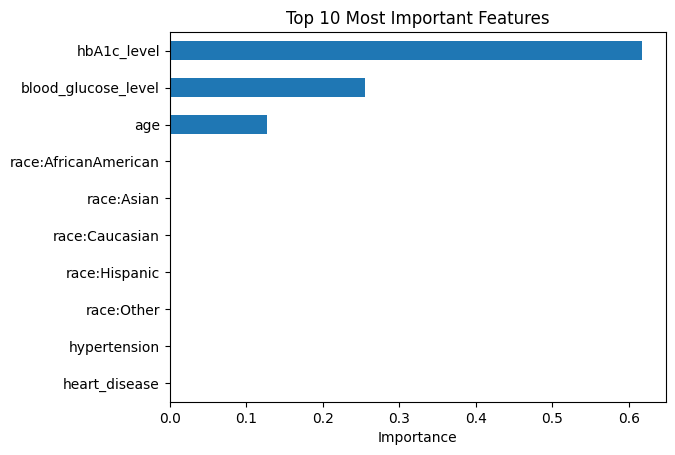

In [6]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

*   The top features are how much sugar is in someone's blood (hbA1c and blood glucose)
*   Age is another feature behind sugar in one's blood

### This model relies heavily on sugar in a person's blood when deciding if they have diabetes. This makes sense because this is typically checked to see if someone has diabetes. Additionally, the algorithm found age as being important too, which is also known to be linked to diabetes.
